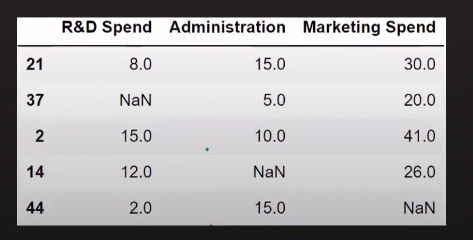

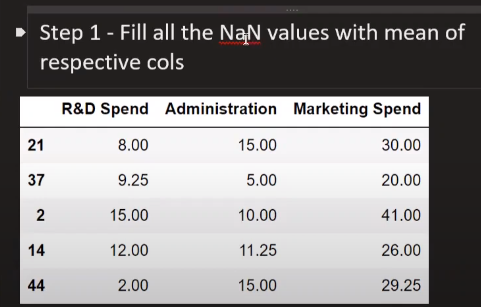

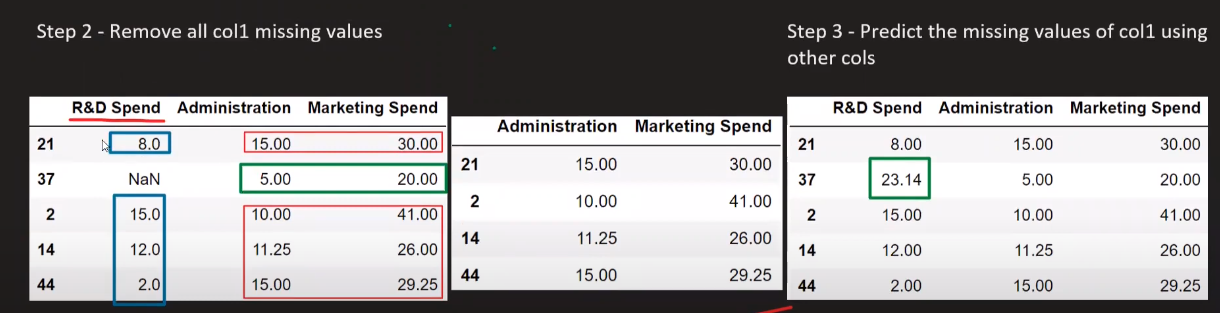

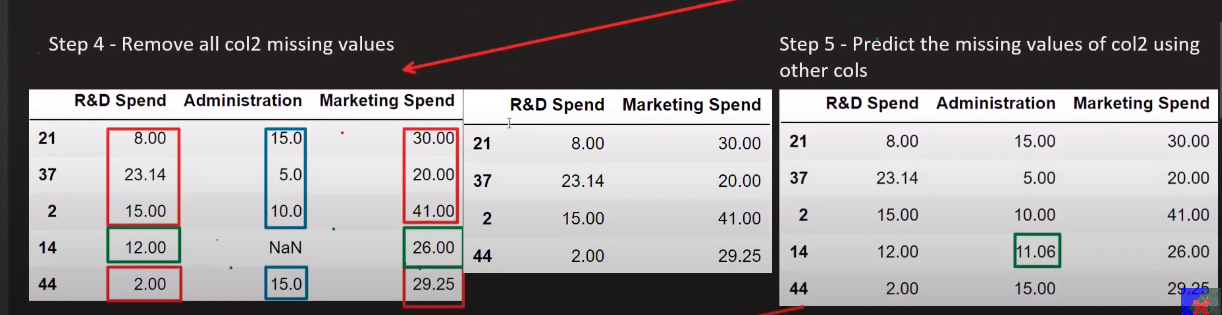

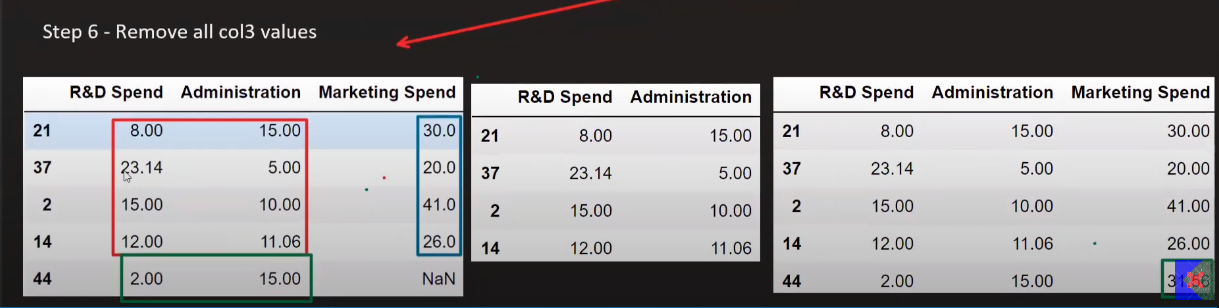

Data should be Missing At Random (MAR)

Disadvantage:
    
    1) Slow
    
    2) When deploy model also have to deploy the train data on server

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

In [2]:
# df = pd.read_csv('datasets/50_Startups.csv')[['R&D Spend','Administration','Marketing Spend','Profit']]

df = pd.read_csv('datasets/50_Startups.csv')[['R&D Spend','Administration','Marketing Spend']]

df.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [3]:
df.shape

(50, 3)

In [4]:
df = np.round(df/10000)

np.random.seed(9)

df = df.sample(5) # Take 5 sample from 50 datapoints

df

,R&D Spend,Administration,Marketing Spend
21,8.0,15.0,30.0
37,4.0,5.0,20.0
2,15.0,10.0,41.0
14,12.0,16.0,26.0
44,2.0,15.0,3.0


In [5]:
df.shape

(5, 3)

In [6]:
# df = df.iloc[:, 0:-1]
# df

In [7]:
df.isnull().mean()*100

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
dtype: float64

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
df.head()

,R&D Spend,Administration,Marketing Spend
0,8.0,15.0,30.0
1,4.0,5.0,20.0
2,15.0,10.0,41.0
3,12.0,16.0,26.0
4,2.0,15.0,3.0


In [10]:
df.iloc[1,0] = np.NaN
df.iloc[3,1] = np.NaN
df.iloc[-1,-1] = np.NaN

In [11]:
df.head()

,R&D Spend,Administration,Marketing Spend
0,8.0,15.0,30.0
1,NaN,5.0,20.0
2,15.0,10.0,41.0
3,12.0,NaN,26.0
4,2.0,15.0,NaN


In [12]:
df.isnull().mean()*100

R&D Spend          20.0
Administration     20.0
Marketing Spend    20.0
dtype: float64

In [13]:
# Step 1 - Impute all missing values with mean of respective column

df0 = pd.DataFrame()

df0['R&D Spend'] = df['R&D Spend'].fillna(df['R&D Spend'].mean())
df0['Administration'] = df['Administration'].fillna(df['Administration'].mean())
df0['Marketing Spend'] = df['Marketing Spend'].fillna(df['Marketing Spend'].mean())

In [14]:
# 0th Iteration

df0

,R&D Spend,Administration,Marketing Spend
0,8.00,15.00,30.00
1,9.25,5.00,20.00
2,15.00,10.00,41.00
3,12.00,11.25,26.00
4,2.00,15.00,29.25


In [15]:
# Remove the col1 imputed value

df1 = df0.copy()

df1.iloc[1, 0] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
0,8.0,15.00,30.00
1,NaN,5.00,20.00
2,15.0,10.00,41.00
3,12.0,11.25,26.00
4,2.0,15.00,29.25


In [16]:
# Use first 3 rows to build a model and use the last for prediction

X = df1.iloc[[0,2,3,4], 1:3]
X

,Administration,Marketing Spend
0,15.00,30.00
2,10.00,41.00
3,11.25,26.00
4,15.00,29.25


In [17]:
y = df1.iloc[[0,2,3,4], 0]
y

0     8.0
2    15.0
3    12.0
4     2.0
Name: R&D Spend, dtype: float64

In [18]:
lr = LinearRegression()

lr.fit(X=X, y=y)

lr.predict(df1.iloc[1, 1:].values.reshape(1,2))

C:\Users\alami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.14158651])

In [19]:
# Fill col-1 missing value using the prediction value

df1.iloc[1, 0] = 23.14

In [20]:
df1

,R&D Spend,Administration,Marketing Spend
0,8.00,15.00,30.00
1,23.14,5.00,20.00
2,15.00,10.00,41.00
3,12.00,11.25,26.00
4,2.00,15.00,29.25


In [21]:
# Remove the col2 imputed value

df1.iloc[3,1] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
0,8.00,15.0,30.00
1,23.14,5.0,20.00
2,15.00,10.0,41.00
3,12.00,NaN,26.00
4,2.00,15.0,29.25


In [22]:
# Use last 3 rows to build a model and use the first for prediction

X = df1.iloc[[0,1,2,4],[0,2]]
X

,R&D Spend,Marketing Spend
0,8.00,30.00
1,23.14,20.00
2,15.00,41.00
4,2.00,29.25


In [23]:
y = df1.iloc[[0,1,2,4],1]
y

0    15.0
1     5.0
2    10.0
4    15.0
Name: Administration, dtype: float64

In [24]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[3,[0,2]].values.reshape(1,2))

C:\Users\alami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.06331285])

In [25]:
df1.iloc[3,1] = 11.06

In [26]:
df1

,R&D Spend,Administration,Marketing Spend
0,8.00,15.00,30.00
1,23.14,5.00,20.00
2,15.00,10.00,41.00
3,12.00,11.06,26.00
4,2.00,15.00,29.25


In [27]:
# Remove the col3 imputed value
df1.iloc[4,-1] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
0,8.00,15.00,30.0
1,23.14,5.00,20.0
2,15.00,10.00,41.0
3,12.00,11.06,26.0
4,2.00,15.00,NaN


In [28]:
# Use last 3 rows to build a model and use the first for prediction
X = df1.iloc[0:4,0:2]
X

,R&D Spend,Administration
0,8.00,15.00
1,23.14,5.00
2,15.00,10.00
3,12.00,11.06


In [29]:
y = df1.iloc[0:4,-1]
y

0    30.0
1    20.0
2    41.0
3    26.0
Name: Marketing Spend, dtype: float64

In [30]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[4,0:2].values.reshape(1,2))

C:\Users\alami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31.56351448])

In [31]:
df1.iloc[4,-1] = 31.56

In [32]:
# After 1st Iteration
df1

,R&D Spend,Administration,Marketing Spend
0,8.00,15.00,30.00
1,23.14,5.00,20.00
2,15.00,10.00,41.00
3,12.00,11.06,26.00
4,2.00,15.00,31.56


In [33]:
# Subtract 0th iteration from 1st iteration

df1 - df0

,R&D Spend,Administration,Marketing Spend
0,0.00,0.00,0.00
1,13.89,0.00,0.00
2,0.00,0.00,0.00
3,0.00,-0.19,0.00
4,0.00,0.00,2.31


In [34]:
df2 = df1.copy()

df2.iloc[1,0] = np.NaN

df2

,R&D Spend,Administration,Marketing Spend
0,8.0,15.00,30.00
1,NaN,5.00,20.00
2,15.0,10.00,41.00
3,12.0,11.06,26.00
4,2.0,15.00,31.56


In [35]:
X = df2.iloc[[0,2,3,4],1:3]
y = df2.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[1,1:].values.reshape(1,2))

C:\Users\alami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.78627207])

In [36]:
df2.iloc[1,0] = 23.78

In [37]:
df2.iloc[3,1] = np.NaN
X = df2.iloc[[0,1,2,4],[0,2]]
y = df2.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[3,[0,2]].values.reshape(1,2))

C:\Users\alami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.22020174])

In [38]:
df2.iloc[3,1] = 11.22

In [39]:
df2.iloc[4,-1] = np.NaN

X = df2.iloc[0:4,0:2]
y = df2.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[4,0:2].values.reshape(1,2))

C:\Users\alami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38.87979054])

In [40]:
df2.iloc[4,-1] = 31.56

In [41]:
df2

,R&D Spend,Administration,Marketing Spend
0,8.00,15.00,30.00
1,23.78,5.00,20.00
2,15.00,10.00,41.00
3,12.00,11.22,26.00
4,2.00,15.00,31.56


In [42]:
df2 - df1

,R&D Spend,Administration,Marketing Spend
0,0.00,0.00,0.0
1,0.64,0.00,0.0
2,0.00,0.00,0.0
3,0.00,0.16,0.0
4,0.00,0.00,0.0


In [43]:
df3 = df2.copy()

df3.iloc[1,0] = np.NaN

df3

,R&D Spend,Administration,Marketing Spend
0,8.0,15.00,30.00
1,NaN,5.00,20.00
2,15.0,10.00,41.00
3,12.0,11.22,26.00
4,2.0,15.00,31.56


In [44]:
X = df3.iloc[[0,2,3,4],1:3]
y = df3.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[1,1:].values.reshape(1,2))

C:\Users\alami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24.57698058])

In [45]:
df3.iloc[1,0] = 24.57

In [46]:
df3.iloc[3,1] = np.NaN
X = df3.iloc[[0,1,2,4],[0,2]]
y = df3.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[3,[0,2]].values.reshape(1,2))

C:\Users\alami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.37282844])

In [47]:
df3.iloc[3,1] = 11.37

In [48]:
df3.iloc[4,-1] = np.NaN

X = df3.iloc[0:4,0:2]
y = df3.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[4,0:2].values.reshape(1,2))

C:\Users\alami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45.53976417])

In [49]:
df3.iloc[4,-1] = 45.53

In [50]:
df2.iloc[3,1] = 11.22

In [51]:
df3

,R&D Spend,Administration,Marketing Spend
0,8.00,15.00,30.00
1,24.57,5.00,20.00
2,15.00,10.00,41.00
3,12.00,11.37,26.00
4,2.00,15.00,45.53


In [52]:
df3 - df2

,R&D Spend,Administration,Marketing Spend
0,0.00,0.00,0.00
1,0.79,0.00,0.00
2,0.00,0.00,0.00
3,0.00,0.15,0.00
4,0.00,0.00,13.97
